In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
X = np.array([1.2, 2.3, 3.1, 4.5, 4.9, 5.6, 6.7, 7.8, 8.9, 9.0])
y = np.array([2.4, 3.6, 4.8, 6.0, 7.2, 8.4, 9.6, 10.8, 12.0, 13.2])

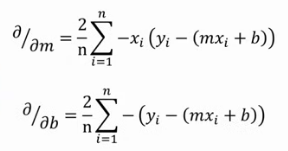

In [40]:
def gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):
    m_curr = b_curr = 0.0
    n = len(X)
    for i in range(num_iterations):
        y_predicted = m_curr * X + b_curr
        error = y - y_predicted
        cost = (1/n) * sum([val**2 for val in (error)]) # mean squared error
        if i % 6 == 0:
            print(f"Iteration {i}: Cost {cost}, m {m_curr}, b {b_curr}")
        md = -(2/n) * sum(X * (error))
        bd = -(2/n) * sum(error)
        m_curr -= learning_rate * md
        b_curr -= learning_rate * bd
    return m_curr, b_curr

In [41]:
m, b = gradient_descent(X, y, learning_rate=0.001, num_iterations=100)

Iteration 0: Cost 72.72000000000001, m 0.0, b 0.0
Iteration 6: Cost 29.286046392441378, m 0.5098278941410608, b 0.07819240926571072
Iteration 12: Cost 11.84536413168773, m 0.832845339248244, b 0.12805357463873102
Iteration 18: Cost 4.842102884722921, m 1.037485898529735, b 0.15996127878834968
Iteration 24: Cost 2.0299171267374043, m 1.1671141650446528, b 0.18049165781501333
Iteration 30: Cost 0.9006294458233249, m 1.2492091686353, b 0.1938118419198315
Iteration 36: Cost 0.44709832062095906, m 1.301183665291863, b 0.20256243606744523
Iteration 42: Cost 0.26491294617439953, m 1.3340716715239067, b 0.20841672534128722
Iteration 48: Cost 0.1916849227144422, m 1.3548651602847013, b 0.21243502903031938
Iteration 54: Cost 0.16220829533549108, m 1.3679947652285045, b 0.21528924572254346
Iteration 60: Cost 0.15030005654560996, m 1.3762680650096506, b 0.217405141769867
Iteration 66: Cost 0.1454465970382137, m 1.3814641499703844, b 0.2190525158377616
Iteration 72: Cost 0.14342624740110443, m 1.38

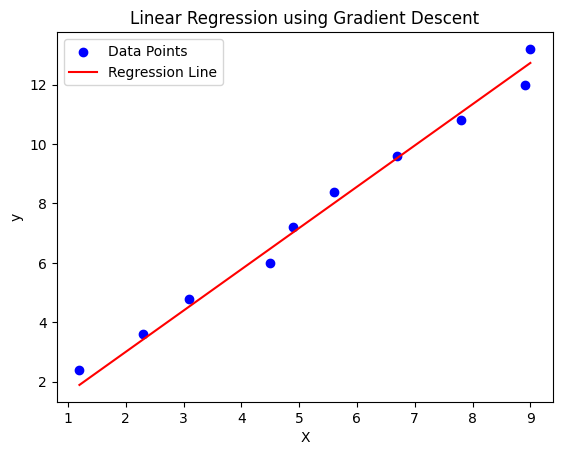

Betas:  1.3892619422408214 0.22506984156253418
RMSE:  0.376320237312945


In [42]:
y_predicted = m * X + b
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_predicted, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression using Gradient Descent')
plt.legend()
plt.show()
# comparison of betas, rmse and predictions
print("Betas: ", m, b)
print("RMSE: ", np.sqrt(np.mean((y - y_predicted) ** 2)))
# --- IGNORE ---

Betas (sklearn): [1.3321267] 0.6065158371040749
RMSE (sklearn): 0.33861041563227307


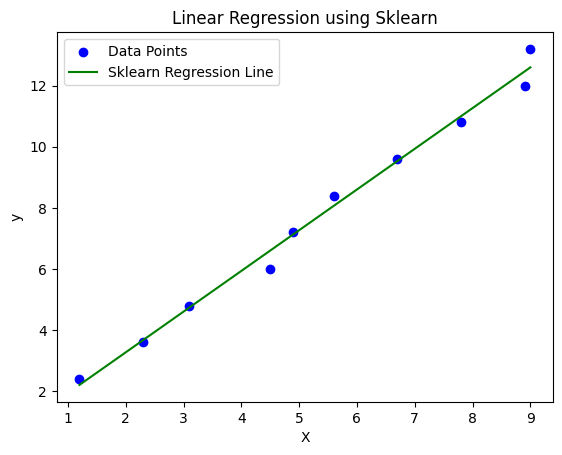

In [43]:
# sklearn regression model
from sklearn.linear_model import LinearRegression
X = X.reshape(-1, 1)  # Reshape for sklearn
LR_model = LinearRegression()
LR_model.fit(X, y)
y_predict_sklearn = LR_model.predict(X)
error_sklearn = y_predict_sklearn - y
mse_sklearn = np.mean(error_sklearn ** 2)
rmse_sklearn = np.sqrt(mse_sklearn)
print("Betas (sklearn):", LR_model.coef_, LR_model.intercept_)
print("RMSE (sklearn):", rmse_sklearn)
# comparison of betas, rmse and predictions
# visualize predictions
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_predict_sklearn, color='green', label='Sklearn Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression using Sklearn')
plt.legend()
plt.show()

In [44]:
comparison_df = pd.DataFrame({
    'X': X.flatten(),
    'y': y,
    'y_predicted_custom': y_predicted,
    'y_predicted_sklearn': y_predict_sklearn
})
display(comparison_df)

,X,y,y_predicted_custom,y_predicted_sklearn
0,1.2,2.4,1.892184,2.205068
1,2.3,3.6,3.420372,3.670407
2,3.1,4.8,4.531782,4.736109
3,4.5,6.0,6.476749,6.601086
4,4.9,7.2,7.032453,7.133937
5,5.6,8.4,8.004937,8.066425
6,6.7,9.6,9.533125,9.531765
7,7.8,10.8,11.061313,10.997104
8,8.9,12.0,12.589501,12.462443
9,9.0,13.2,12.728427,12.595656
